<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fit-Simple-Linear-Regression" data-toc-modified-id="Fit-Simple-Linear-Regression-1">Fit Simple Linear Regression</a></span></li><li><span><a href="#Let's-get-some-data" data-toc-modified-id="Let's-get-some-data-2">Let's get some data</a></span></li><li><span><a href="#Let's-pick-a-baseline-algorithm" data-toc-modified-id="Let's-pick-a-baseline-algorithm-3">Let's pick a baseline algorithm</a></span></li><li><span><a href="#Let's-put-it-all-together-" data-toc-modified-id="Let's-put-it-all-together--4">Let's put it all together </a></span></li><li><span><a href="#Other-linear-models" data-toc-modified-id="Other-linear-models-5">Other linear models</a></span></li><li><span><a href="#Check-for-understanding" data-toc-modified-id="Check-for-understanding-6">Check for understanding</a></span></li><li><span><a href="#What-should-we-do-next?" data-toc-modified-id="What-should-we-do-next?-7">What should we do next?</a></span></li><li><span><a href="#Takeaways" data-toc-modified-id="Takeaways-8">Takeaways</a></span></li><li><span><a href="#Sources-of-Inspiration" data-toc-modified-id="Sources-of-Inspiration-9">Sources of Inspiration</a></span></li><li><span><a href="#Bonus-Material" data-toc-modified-id="Bonus-Material-10">Bonus Material</a></span></li></ul></div>

Fit Simple Linear Regression
-------

<center><img src="../images/the reality of coding.png" width="75%"/></center>

This will demo how to fit a simple linear regression to the diabetes dataset.

In [231]:
reset -fs

Let's get some data
----

In [232]:
from sklearn.datasets import load_diabetes

Let's read the documentation

https://scikit-learn.org/stable/datasets.html

In [233]:
# help(load_diabetes)

In [234]:
diabetes_data = load_diabetes()

print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [235]:
type(diabetes_data)

# What is a bunch object?
# A bunch object is dictionary that allows you to use the keys as attributes.

sklearn.utils.Bunch

In [236]:
# All scikit-learn dataset has the following elements
diabetes_data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [237]:
# Attribute access via "." method is a feature of a bunch datatype
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [238]:
# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)

In [239]:
# Always look at raw data
# "Tidy" array
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [240]:
X.shape

(442, 10)

In [241]:
import numpy as np

# Use only one feature
X = X[:, np.newaxis, 2]
X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [242]:
# The structure of targets are crictal

print(y.dtype)

# We have "continuous" values for both so linear regression is appropriate. 

float64


In [243]:
# Machine learning's goal is predict. 
# Prediction is best measured on a test set.

from sklearn.model_selection import train_test_split

Let's read the documentation

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [245]:
print(X_train.shape)
print(y_train.shape)

(331, 1)
(331,)


<center><img src="../images/ml_workflow.png" width="75%"/></center>

Let's pick a baseline algorithm
----

In [246]:
from sklearn.linear_model import LinearRegression

In [247]:
# help(LinearRegression)

Let's read the documentation

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [248]:
# Create a specific linear regression instance from class template

regr = LinearRegression()

In [249]:
# Train the model using the training sets

# oop is
#    noun.verb(noun)
#    classifer.fit(data)

regr.fit(X_train, y_train)

LinearRegression()

In [250]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [251]:
# Let's explore the instance
# regr.<tab>

# regr.intercept_
# regr.coef_

In [252]:
# The model parameters
print(f"Intercept:    {regr.intercept_:.2f}")
print(f"Coefficients: {regr.coef_[0]:.2f}")

Intercept:    151.40
Coefficients: 938.16


In [253]:
# Use mean squared error as evaluation metric 

from sklearn.metrics import mean_squared_error

Let's read the documentation

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [254]:
mse = mean_squared_error(y_test, y_pred)

# See coding guidelines for signficant digits
print(f"Mean squared error: {mse:,.2f}") 

Mean squared error: 3,960.47


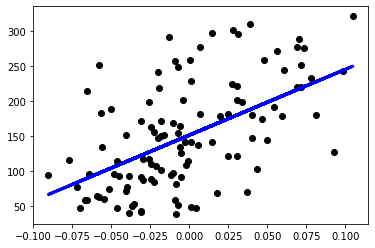

In [255]:
# Plot outputs

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
# See coding guidelines for semicolon use

In [256]:
# Let's use pipelines

from sklearn.pipeline import Pipeline

Let's read the documentation

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [257]:
# StandardScaler is a honkin' good idea for linear regression
from sklearn.preprocessing import StandardScaler

Let's read the documentation

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [258]:
# Create a specific instance of the Pipeline class template
# Each pipeline is list - ordered and mutable
# Each item in the pipelin will have nickname and instantiate a class
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('lr',     LinearRegression())
                ])

# Call fit as any other estimator 
pipe.fit(X_train, y_train)

"""
Calling fit on the pipeline is the same as calling fit on each estimator in turn, 
transform the input and pass it on to the next step. 
The pipeline has all the methods that the last estimator in the pipeline has, 
i.e. if the last estimator is a classifier, the Pipeline can be used as a classifier.
https://scikit-learn.org/stable/modules/compose.html#notes
""" 

# Make predictions using the testing set
y_pred = pipe.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:,.2f}")  

Mean squared error: 3,960.47


In [259]:
# Get the parameters from a pipeline pipe
print(f"Intercept:    {pipe['lr'].intercept_:.2f}")
print(f"Coefficients: {pipe['lr'].coef_[0]:.2f}")

Intercept:    152.25
Coefficients: 45.88


In [260]:
# Let's try to improve our model with looking for better hyperparameters
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('lr',     LinearRegression(fit_intercept=False))])

pipe.fit(X_train, y_train)
diabetes_y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:,.2f}")

Mean squared error: 3,960.47


Let's put it all together 
-----

In [261]:
reset -fs

In [262]:
from sklearn.datasets        import load_diabetes
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler

# Let's scale up to use all features 
X, y = load_diabetes(return_X_y=True)

# Give the split a better name
# Note: I looked at the test set twice previously which is not a best practice. 
#       Looking at test set more than once means I won't be able to estimate how well my model will fit on other data.
X_train, X_validation, y_train, y_validation= train_test_split(X, y)

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('lr',     LinearRegression())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"Mean squared error: {mse:,.2f}")

# If I run this cell multiple times, 
# I'll get slightly different results because of the random splitting. 
# You should be confortable with notation that slight changes in the data will yield different fits.
# This is formally called Variance in machine learning.

Mean squared error: 3,361.84


Other linear models
------

In [263]:
reset -fs

In [264]:
from sklearn.linear_model import *

In [265]:
whos

Variable                      Type        Data/Info
---------------------------------------------------
ARDRegression                 ABCMeta     <class 'sklearn.linear_mo<...>el._bayes.ARDRegression'>
BayesianRidge                 ABCMeta     <class 'sklearn.linear_mo<...>el._bayes.BayesianRidge'>
ElasticNet                    ABCMeta     <class 'sklearn.linear_mo<...>nate_descent.ElasticNet'>
ElasticNetCV                  ABCMeta     <class 'sklearn.linear_mo<...>te_descent.ElasticNetCV'>
GammaRegressor                type        <class 'sklearn.linear_mo<...>_glm.glm.GammaRegressor'>
Hinge                         type        <class 'sklearn.linear_model._sgd_fast.Hinge'>
Huber                         type        <class 'sklearn.linear_model._sgd_fast.Huber'>
HuberRegressor                ABCMeta     <class 'sklearn.linear_mo<...>l._huber.HuberRegressor'>
Lars                          ABCMeta     <class 'sklearn.linear_model._least_angle.Lars'>
LarsCV                        ABCMeta  

How do we pick?

1. We can discard algorithms that are not appropriate (e.g., MultiTask*, or *Classifier). A rough guide is [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

2. We decide empirically (see Brian's ML Tenets.

How do we learn about each one of them?

Like eating an elephant, one bite at a time.

1. Find most common first
2. Look up documentation
3. Make flashcard

Let's read the documentation

https://scikit-learn.org/stable/modules/linear_model.html

<center><h2>Check for understanding</h2></center>

What are the similarities between [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)?  
What are the differences between the two?  
When would should I pick LinearRegression and when should I pick SGDRegressor?

They both implement the linear regression algorithm.

The most difference is LinearRegression fits the linear regression model (aka, estimate the unknown parameters) with ordinary least squares (OLS) optimization technique and SGDRegressor fist the model linear regression with stochastic gradient descent (SGD) nown parameters) with ordinary least squares (OLS) . 

The result of picking different optimization is that LinearRegression will fit faster (closed-form) but restricted in the loss function to residual sum of squares. The SGD is iterative thus typically slower. SGD can use a wide variety of loss functions:

>  ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’:

> - ‘squared_loss’ refers to the ordinary least squares fit.   
> - ‘huber’ modifies ‘squared_loss’ to focus less on getting outliers correct by switching from squared to linear loss past a distance of epsilon. 
> - ‘epsilon_insensitive’ ignores errors less than epsilon and is linear past that; this is the loss function used in SVR.   
> - ‘squared_epsilon_insensitive’ is the same but becomes squared loss past a tolerance of epsilon.

In [266]:
# Setup
from sklearn.datasets        import load_diabetes
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler

X, y = load_diabetes(return_X_y=True)
# Fix seed
# We'll temporary fix the random seed so we can do "science" - Control as many factors as possible
X_train, X_validation, y_train, y_validation= train_test_split(X, y, random_state=42)

In [267]:
# Poll - Which algorithm do you think will be best (as defined by smallest MSE on validation dataset)?
algorithms = [LinearRegression(), 
              Lasso(), 
              Ridge(), 
              ElasticNet(), 
              HuberRegressor(), 
              SGDRegressor()]

In [268]:
# Programmatically fit 

results = dict()

for algo in algorithms:
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('lm',     algo)])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_validation)
    mse = mean_squared_error(y_validation, y_pred)
    print(f"{algo.__class__.__name__:<17} - mean squared error: {mse:,.2f}")

LinearRegression  - mean squared error: 2,848.30
Lasso             - mean squared error: 2,784.98
Ridge             - mean squared error: 2,842.82
ElasticNet        - mean squared error: 2,856.77
HuberRegressor    - mean squared error: 2,864.72
SGDRegressor      - mean squared error: 2,849.22


Lasso appears to be our current champion.

Typically your retrain the champion model on all the data for the final model:

In [269]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('lasso',     Lasso())])
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('lasso', Lasso())],
 'verbose': False,
 'scaler': StandardScaler(),
 'lasso': Lasso(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [270]:
pipe['lasso'].get_params() 

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [273]:
# Use dictionary for hand-tuning
hyperparameters = {'alpha': 1.0,
                 'copy_X': True,
                 'fit_intercept': True,
                 'max_iter': 1000,
                 'normalize': False,
                 'positive': False,
                 'precompute': False,
                 'random_state': None,
                 'selection': 'cyclic',
                 'tol': 0.0001,
                 'warm_start': False}

In [277]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('lasso',     Lasso(**hyperparameters))])

In [278]:
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso())])

In [279]:
# Display the parameters from a pipeline pipe

diabetes_data = load_diabetes() # Get data bunch to display feature names

print(f"Intercept:        {pipe['lasso'].intercept_:.2f}")
print(f"Coefficients:", end=" ")
for feature_name, coef in zip(diabetes_data.feature_names, pipe['lasso'].coef_):
    print(f"{feature_name:>3} {coef:>6,.2f}", end="\n              ")

Intercept:        152.13
Coefficients: age  -0.00
              sex  -9.32
              bmi  24.83
               bp  14.09
               s1  -4.84
               s2  -0.00
               s3 -10.62
               s4   0.00
               s5  24.42
               s6   2.56
              

What should we do next?
-------

So much...   
(Data analysis typically raises combinatorial options. That is why data people will always have jobs.). 

1. Hyperparameter tuning
    
    Thus far we have just being using the defaults for the algorithms (typically, scikit-learn defaults are pretty good).
    Each of the algorithms can take making arguments. For example `SGDRegressor` can take many different kinds of loss functions.
<br>
1. Cross validation

    There is an automate way to train and evaluate across the dataset
<br>
1. Feature engineering

    More and better features improve model performance.

Mapping from method call to steps in modeling
------

<center><img src="../images/functions_steps.png" width="75%"/></center>


<center><h2>Sources of Inspiration</h2></center>

- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
- https://realpython.com/train-test-split-python-data/

Bonus Material
-------

- [Normalization has no impact predictive performance](https://stackoverflow.com/questions/54067474/comparing-results-from-standardscaler-vs-normalizer-in-linear-regression)
- [Multicollinearity has no impact predictive performance](https://gist.github.com/brianspiering/f3cf96c61d2785978f336c75b63ad7c7) Even if features are perfectly correlated, algorithms will still predict at the same level.